In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
df=pd.read_csv(r'C:\Users\dhruv\Downloads\datasets\head.csv')

In [165]:
df.head()

,Unnamed: 0,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,90,Bronchial Asthma,Lungs,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91,Bronchial Asthma,Lungs,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,Bronchial Asthma,Lungs,fatigue,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93,Bronchial Asthma,Lungs,fatigue,cough,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94,Bronchial Asthma,Lungs,fatigue,cough,high_fever,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df.isnull().sum()

Unnamed: 0      0
Disease         0
Type            0
Symptom_1      44
Symptom_2      44
Symptom_3      43
Symptom_4      43
Symptom_5      47
Symptom_6      91
Symptom_7     165
Symptom_8     166
Symptom_9     162
Symptom_10    163
Symptom_11    214
Symptom_12    285
Symptom_13    287
Symptom_14    289
Symptom_15    289
Symptom_16    337
Symptom_17    409
dtype: int64

## Preprocessing

In [125]:
df=df.drop(columns=['Unnamed: 0','Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
       'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17'],axis=1)
df.head()

,Disease,Type,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9
0,Migraine,Head,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances
1,Migraine,Head,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN
2,Migraine,Head,acidity,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN
3,Migraine,Head,acidity,indigestion,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN
4,Migraine,Head,acidity,indigestion,headache,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN


In [126]:
df.fillna("None",inplace=True)

In [127]:
df=df.drop(columns="Type",axis =1)

In [112]:
d=df["Disease"]

## Encoding

In [107]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [114]:
le.fit(df.values.flatten())


LabelEncoder()

In [115]:
df=pd.DataFrame(columns=df.columns, data=le.transform(df.values.flatten()).reshape(df.shape))

In [116]:
df["Disease"]=d

In [117]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' acidity': 0, ' altered_sensorium': 1, ' blurred_and_distorted_vision': 2, ' depression': 3, ' excessive_hunger': 4, ' headache': 5, ' indigestion': 6, ' irritability': 7, ' loss_of_balance': 8, ' nausea': 9, ' spinning_movements': 10, ' stiff_neck': 11, ' unsteadiness': 12, ' visual_disturbances': 13, ' vomiting': 14, ' weakness_of_one_body_side': 15, '(vertigo) Paroymsal  Positional Vertigo': 16, 'Migraine': 17, 'No disease': 18, 'None': 19, 'Paralysis (brain hemorrhage)': 20}


## Shuffling the rows

In [118]:
df1=df.sample(frac=1)
df1

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9
80,(vertigo) Paroymsal Positional Vertigo,14,5,9,10,8,12,19,19,19
190,Paralysis (brain hemorrhage),14,5,15,1,19,19,19,19,19
173,(vertigo) Paroymsal Positional Vertigo,14,9,10,8,12,19,19,19,19
229,Paralysis (brain hemorrhage),14,5,15,1,19,19,19,19,19
317,(vertigo) Paroymsal Positional Vertigo,14,5,9,10,8,12,19,19,19
...,...,...,...,...,...,...,...,...,...,...
19,Paralysis (brain hemorrhage),14,5,1,19,19,19,19,19,19
85,(vertigo) Paroymsal Positional Vertigo,14,5,9,8,12,19,19,19,19
398,No disease,19,19,19,19,19,7,19,19,19
383,No disease,19,19,19,19,19,19,19,19,19


## Correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Symptom_1'),
  Text(0, 1.5, 'Symptom_2'),
  Text(0, 2.5, 'Symptom_3'),
  Text(0, 3.5, 'Symptom_4'),
  Text(0, 4.5, 'Symptom_5'),
  Text(0, 5.5, 'Symptom_6'),
  Text(0, 6.5, 'Symptom_7'),
  Text(0, 7.5, 'Symptom_8'),
  Text(0, 8.5, 'Symptom_9')])

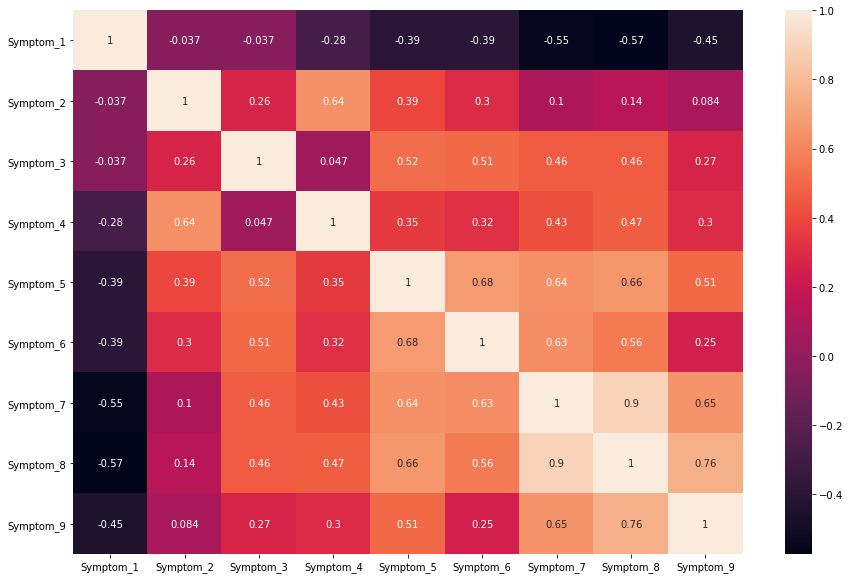

In [15]:
plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.yticks(rotation=0)

In [51]:
df2=df1.groupby("Disease")

In [52]:
df2.get_group("Migraine")

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9
31,Migraine,6,5,2,4,11,3,7,13,0
127,Migraine,19,6,5,2,4,11,7,13,0
91,Migraine,6,5,2,4,11,3,7,13,0
282,Migraine,19,6,5,2,4,11,3,7,13
92,Migraine,19,5,2,4,11,3,7,13,0
...,...,...,...,...,...,...,...,...,...,...
98,Migraine,19,6,5,2,4,11,3,13,0
306,Migraine,19,6,5,2,4,11,3,7,13
255,Migraine,19,6,5,2,4,11,3,7,13
198,Migraine,19,6,5,2,4,11,3,7,13


## Models

In [92]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
rf01  = RandomForestClassifier(n_estimators=200 , criterion="gini", oob_score=True)
rf01.fit(x_train, y_train)
y_pred=rf01.predict(x_test)

In [95]:
result_rf=accuracy_score(y_test,y_pred)
result_rf

1.0

In [68]:
print(confusion_matrix(y_test,y_pred))

[[38  0  0  0]
 [ 0 34  0  0]
 [ 0  0 13  0]
 [ 0  0  0 38]]


In [21]:
b=rf01.predict_proba(x_test)
print(b)

[[0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.025 0.    0.955 0.02 ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.065 0.    0.815 0.12 ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.95  0.05 ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 

In [97]:
p = mod0.predict([[19,19,19,19,19,19,19,8,19]])

In [98]:
print(p)

['No disease']


In [101]:
print(mod0.predict_proba([[19,19,19,19,19,19,19,8,19]]))

[[1.72913536e-10 6.45556964e-11 9.99998087e-01 1.91253126e-06]]


In [102]:
mod0.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'Migraine',
       'No disease', 'Paralysis (brain hemorrhage)'], dtype=object)

In [96]:
mod0=LogisticRegression()
mod0.fit(x_train,y_train)
y_p=mod0.predict_proba(x_test)
print(y_p)

[[1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [2.17000965e-05 9.99205572e-01 9.09058450e-07 7.71818934e-04]
 [1.69435927e-05 9.99521849e-01 3.62510329e-06 4.57582506e-04]
 [9.99868417e-01 7.84931214e-05 3.81605153e-05 1.49295940e-05]
 [1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [9.99868417e-01 7.84931214e-05 3.81605153e-05 1.49295940e-05]
 [1.32007476e-03 5.79537682e-05 2.28745246e-05 9.98599097e-01]
 [5.24632354e-03 8.70399946e-06 1.71300253e-02 9.77614947e-01]
 [9.99868417e-01 7.84931214e-05 3.81605153e-05 1.49295940e-05]
 [2.77452502e-05 9.98923064e-01 5.08138999e-07 1.04868295e-03]
 [2.67301293e-03 1.63402700e-05 1.69591659e-02 9.80351481e-01]
 [7.91661766e-04 9.99108022e-01 8.46428735e-05 1.56732851e-05]
 [9.94963017e-01 1.63405342e-04 5.35153589e-05 4.820062

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
x_test.iloc[2,:]

Symptom_1    14
Symptom_2     5
Symptom_3    15
Symptom_4     1
Symptom_5    19
Symptom_6    19
Symptom_7    19
Symptom_8    19
Symptom_9    19
Name: 340, dtype: int32